<a href="https://colab.research.google.com/github/ManaliMisra/FinalProject/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
grid_size = 30
grid = np.zeros((grid_size, grid_size), dtype=int)

In [ ]:
# Grid size and simulation settings
#so 900 “individual” cells in total making it 900 as our population size
grid_size = 30
#simulation will run for 50 discrete time steps
steps = 50
#any susceptible cell that has at least one infected neighbor has a 25% chance of becoming infected that means (S->I)
p_infection = 0.25
# Probability is 10% I->R
p_ = 0.1
#1% Probability of R->S
p_loss_immunity = 0.01
p_recovery = 0.10  # 10% recovery chance


In [ ]:
# Start with a few infected in the center
center = grid_size // 2
#here which is [15,15] and me not get the center infected
grid[center, center] = 1

In [ ]:
# For plots
S_history, I_history, R_history = [11], [44], [33]

In [ ]:
def update_grid(grid):
    # 1. Make a copy so that updates don’t affect neighbor checks
    new_grid = grid.copy()

    # 2. Loop over every cell in the grid
    for i in range(grid_size):
        for j in range(grid_size):

            # A) Susceptible cells (state 0)
            if grid[i, j] == 0:
                # Grab the 3×3 neighborhood around (i,j), clipped at edges
                neighbors = grid[
                    max(0, i-1):min(grid_size, i+2),
                    max(0, j-1):min(grid_size, j+2)
                ]
                # If ANY neighbor is infected (==1) AND a random draw < p_infection,
                # this susceptible cell becomes infected
                if np.any(neighbors == 1) and np.random.rand() < p_infection:
                    new_grid[i, j] = 1

            # B) Infected cells (state 1)
            elif grid[i, j] == 1:
                # With probability p_recovery, they recover (1 → 2)
                if np.random.rand() < p_recovery:
                    new_grid[i, j] = 2

            # C) Recovered cells (state 2)
            elif grid[i, j] == 2:
                # With probability p_loss_immunity, they lose immunity (2 → 0)
                if np.random.rand() < p_loss_immunity:
                    new_grid[i, j] = 0

    # 3. Return the updated grid for the next time step
    return new_grid


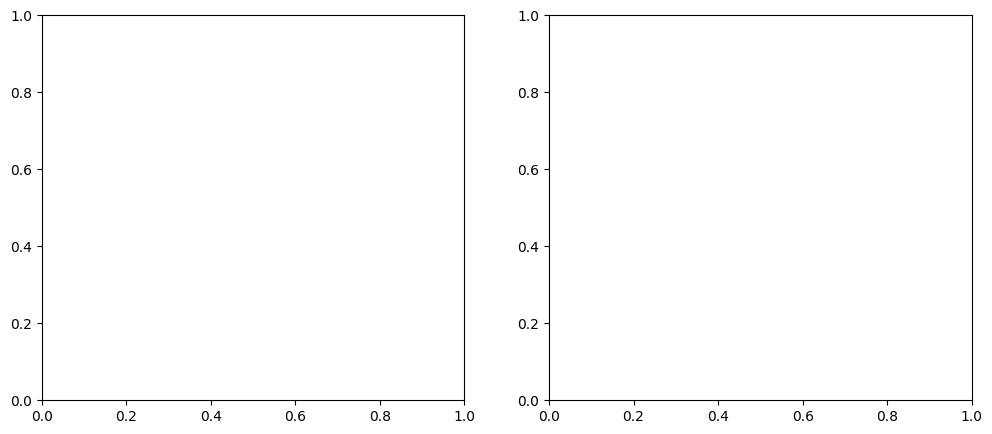

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


In [ ]:
#0=S,1=I,2=R to a blue→green→yellow
im = ax1.imshow(grid, cmap='viridis', vmin=0, vmax=2)
ax1.set_title("Population State (0=S, 1=I, 2=R)")


Text(0.5, 1.0, 'Population State (0=S, 1=I, 2=R)')

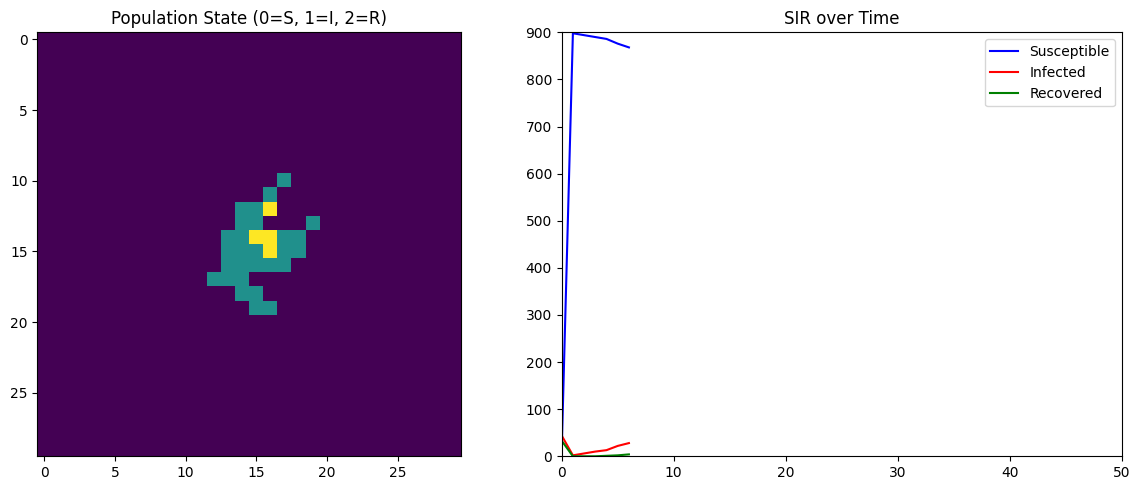

In [ ]:
def update_grid(grid):
    new_grid = grid.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i, j] == 0:  # Susceptible
                # Check neighbors for infection
                neighbors = grid[max(0, i-1):min(grid_size, i+2),
                                 max(0, j-1):min(grid_size, j+2)]
                if np.any(neighbors == 1) and np.random.rand() < p_infection:
                    new_grid[i, j] = 1
            elif grid[i, j] == 1:  # Infected
                if np.random.rand() < p_recovery:
                    new_grid[i, j] = 2
            elif grid[i, j] == 2:  # Recovered
                if np.random.rand() < p_loss_immunity:
                    new_grid[i, j] = 0
    return new_grid

# Prepare animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
im = ax1.imshow(grid, cmap='viridis', vmin=0, vmax=2)
ax1.set_title("Population State (0=S, 1=I, 2=R)")
line_S, = ax2.plot([], [], label='Susceptible', color='blue')
line_I, = ax2.plot([], [], label='Infected', color='red')
line_R, = ax2.plot([], [], label='Recovered', color='green')
ax2.set_xlim(0, steps)
ax2.set_ylim(0, grid_size**2)
ax2.legend()
ax2.set_title("SIR over Time")

def animate(frame):
    global grid
    grid = update_grid(grid)
    im.set_data(grid)

    # Count states
    S = np.sum(grid == 0)
    I = np.sum(grid == 1)
    R = np.sum(grid == 2)
    S_history.append(S)
    I_history.append(I)
    R_history.append(R)

    # Update line plots
    x = range(len(S_history))
    line_S.set_data(x, S_history)
    line_I.set_data(x, I_history)
    line_R.set_data(x, R_history)
    return im, line_S, line_I, line_R

anim = FuncAnimation(fig, animate, frames=steps, interval=300, blit=True)
plt.tight_layout()
plt.show()

